In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mplt
import random
import seaborn as sns
from prophet import Prophet


# Dataset 

In [2]:
chicago_ds_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip') #onbad lines =error/ skip / callable  which returns none for that line
chicago_ds_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
chicago_ds_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')

In [3]:
chicago_ds_1

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872338,6254263,4673620,HM269120,04/04/2006 10:00:00 AM,002XX N KOLMAR AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,...,28.0,26.0,08B,1146037.0,1900783.0,2006,04/15/2016 08:55:02 AM,41.883735,-87.739200,"(41.883734918, -87.739199887)"
1872339,6254264,4673621,HM272803,04/04/2006 05:30:00 PM,034XX N MAJOR AVE,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",False,...,38.0,15.0,14,1137757.0,1922269.0,2006,04/15/2016 08:55:02 AM,41.942848,-87.769086,"(41.942848288, -87.769086168)"
1872340,6254265,4673622,HM271989,04/04/2006 06:40:30 PM,081XX S ELLIS AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,VACANT LOT/LAND,False,...,8.0,44.0,04B,1184311.0,1851174.0,2006,04/15/2016 08:55:02 AM,41.746791,-87.600210,"(41.746791148, -87.600209768)"
1872341,6254266,4673623,HM271676,04/04/2006 03:50:00 PM,057XX S COTTAGE GROVE AVE,0460,BATTERY,SIMPLE,STREET,False,...,5.0,41.0,08B,1182559.0,1867082.0,2006,04/15/2016 08:55:02 AM,41.790485,-87.606137,"(41.79048504, -87.606136634)"


In [4]:
#entire_dataset= pd.concat([chicago_ds_1], ignore_index=False, axis=0)

entire_dataset= pd.concat([chicago_ds_1, chicago_ds_2, chicago_ds_3], ignore_index=False, axis=0)
#pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False)


# take a look and explore the entire_dataset for yourself

In [5]:
entire_dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [6]:
entire_dataset.tail(50)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456664,6237826,10508603,HZ250430,05/03/2016 09:42:00 PM,060XX S EBERHART AVE,2029,NARCOTICS,POSS: HEROIN(BLACK TAR),SIDEWALK,True,...,20.0,42.0,18,1180634.0,1865037.0,2016,05/10/2016 03:56:50 PM,41.784918,-87.613258,"(41.784917834, -87.613257846)"
1456665,6238085,10508604,HZ250386,05/03/2016 08:42:00 PM,067XX S LAFLIN ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,STREET,True,...,17.0,67.0,26,1167494.0,1860107.0,2016,05/10/2016 03:56:50 PM,41.771681,-87.661576,"(41.771681167, -87.661575794)"
1456666,6238129,10508605,HZ250426,05/03/2016 10:15:00 PM,074XX S RACINE AVE,0495,BATTERY,AGGRAVATED OF A SENIOR CITIZEN,BAR OR TAVERN,False,...,17.0,68.0,04B,1169614.0,1855298.0,2016,05/10/2016 03:56:50 PM,41.758439,-87.653944,"(41.758438955, -87.653943807)"
1456667,6238323,10508606,HZ250190,05/03/2016 09:30:00 AM,033XX W OGDEN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,POLICE FACILITY/VEH PARKING LOT,False,...,24.0,29.0,14,1154489.0,1891024.0,2016,05/10/2016 03:56:50 PM,41.856790,-87.708424,"(41.856790413, -87.708424071)"
1456668,6238367,10508611,HZ250383,05/03/2016 09:15:00 PM,087XX W FOSTER AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,...,41.0,76.0,14,1116844.0,1933388.0,2016,05/10/2016 03:56:50 PM,41.973712,-87.845721,"(41.973712278, -87.845720835)"
1456669,6239146,10508612,HZ250468,05/03/2016 10:30:00 PM,032XX N MILWAUKEE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,31.0,21.0,08B,1149589.0,1921376.0,2016,05/10/2016 03:56:50 PM,41.940176,-87.725621,"(41.940175866, -87.725620718)"
1456670,6239555,10508613,HZ250408,05/03/2016 07:30:00 AM,062XX W PATTERSON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,...,38.0,17.0,11,1134155.0,1923620.0,2016,05/10/2016 03:56:50 PM,41.946620,-87.782294,"(41.946619877, -87.782293553)"
1456671,6239642,10508619,HZ250392,05/03/2016 05:30:00 PM,002XX S STATE ST,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,...,42.0,32.0,06,1176417.0,1899156.0,2016,05/10/2016 03:56:50 PM,41.878639,-87.627691,"(41.878638996, -87.627691486)"
1456672,6240310,10508622,HZ250423,05/03/2016 01:30:00 PM,0000X E RANDOLPH ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,...,42.0,32.0,06,1176904.0,1901295.0,2016,05/10/2016 03:56:50 PM,41.884498,-87.625839,"(41.884497529, -87.625838595)"
1456673,6240420,10508623,HZ250490,05/03/2016 11:30:00 PM,059XX W FULTON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,29.0,25.0,14,1136840.0,1901402.0,2016,05/10/2016 03:56:50 PM,41.885603,-87.772958,"(41.885603295, -87.772957755)"


<Axes: >

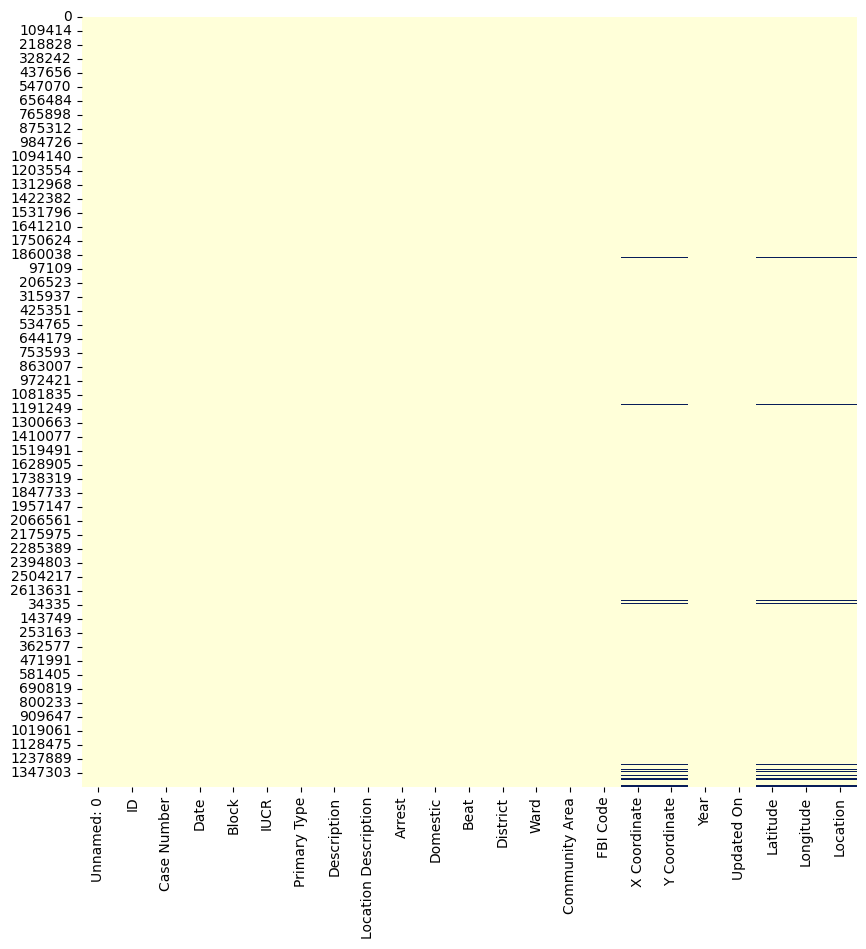

In [7]:
# to find how many null elements are there in the set

mplt.figure(figsize=(10,10))
sns.heatmap(entire_dataset.isnull(), cbar = False, cmap = 'YlGnBu')
#sns.heatmap(entire_dataset.isnull(),cbar= False, cmap = cmap)

In [8]:
entire_dataset.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [9]:
entire_dataset

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [10]:
# Assembling a datetime by rearranging the dataframe column "Date".
# for time series analysis, time date arrangement is important

entire_dataset.Date = pd.to_datetime(entire_dataset.Date, format='%m/%d/%Y %I:%M:%S %p')

In [11]:
entire_dataset.Date # format of date is important

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [12]:
entire_dataset

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
1456709,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [13]:
# set index to be the date 
entire_dataset.index = pd.DatetimeIndex(entire_dataset.Date)

In [14]:
entire_dataset

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [15]:
entire_dataset['Primary Type'].value_counts()

Primary Type
THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

In [16]:
entire_dataset['Primary Type'].value_counts().iloc[:15] # top 15 of the above list

Primary Type
THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: count, dtype: int64

In [17]:
entire_dataset['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object', name='Primary Type')

In [18]:
entire_dataset['Primary Type'].index.duplicated().any()


True

In [19]:
entire_dataset = entire_dataset.reset_index(drop=True)


<Axes: xlabel='count', ylabel='Primary Type'>

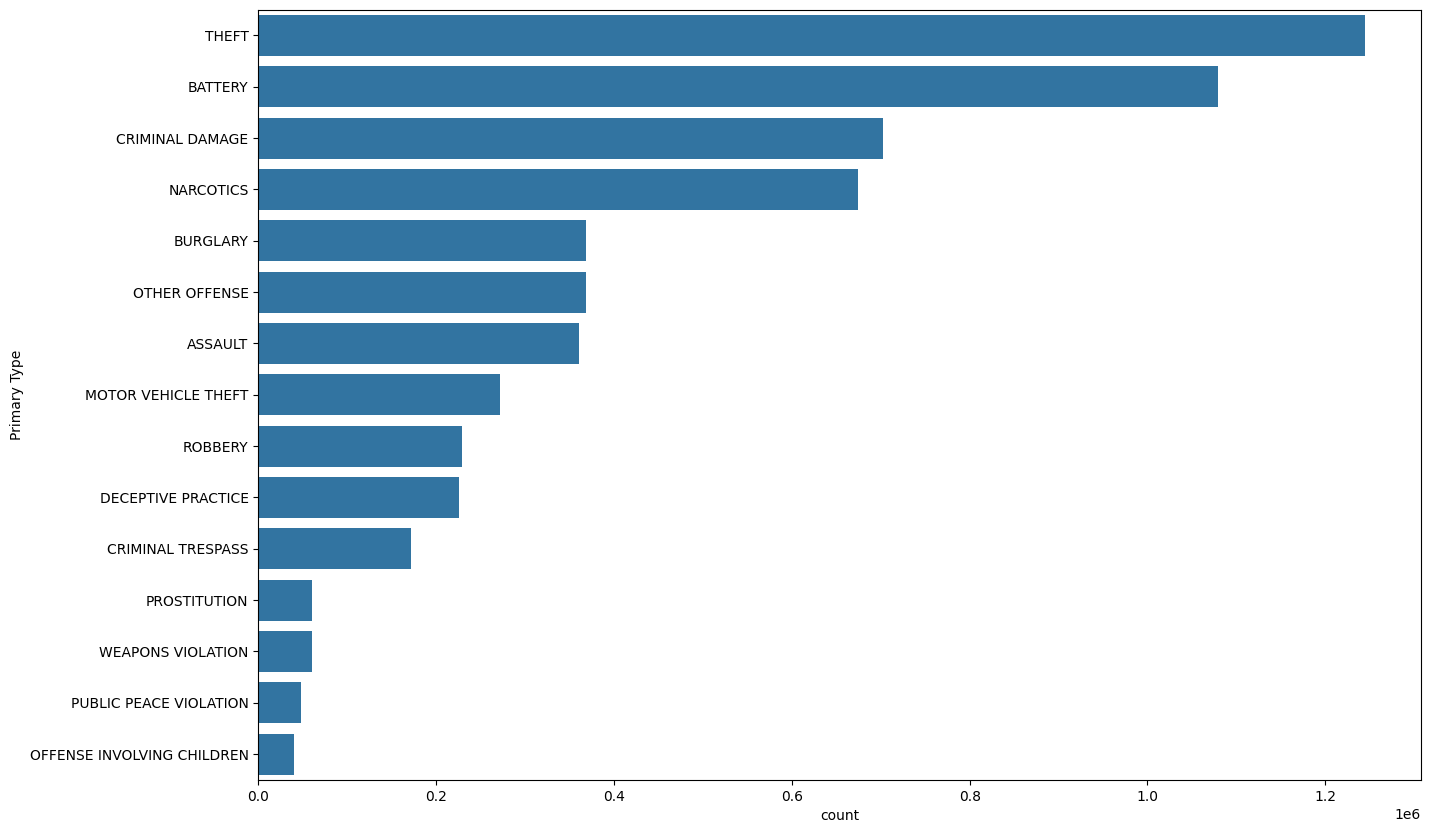

In [20]:
mplt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = entire_dataset, order = entire_dataset['Primary Type'].value_counts().iloc[:15].index)
#mplt.show()

<Axes: xlabel='count', ylabel='Location Description'>

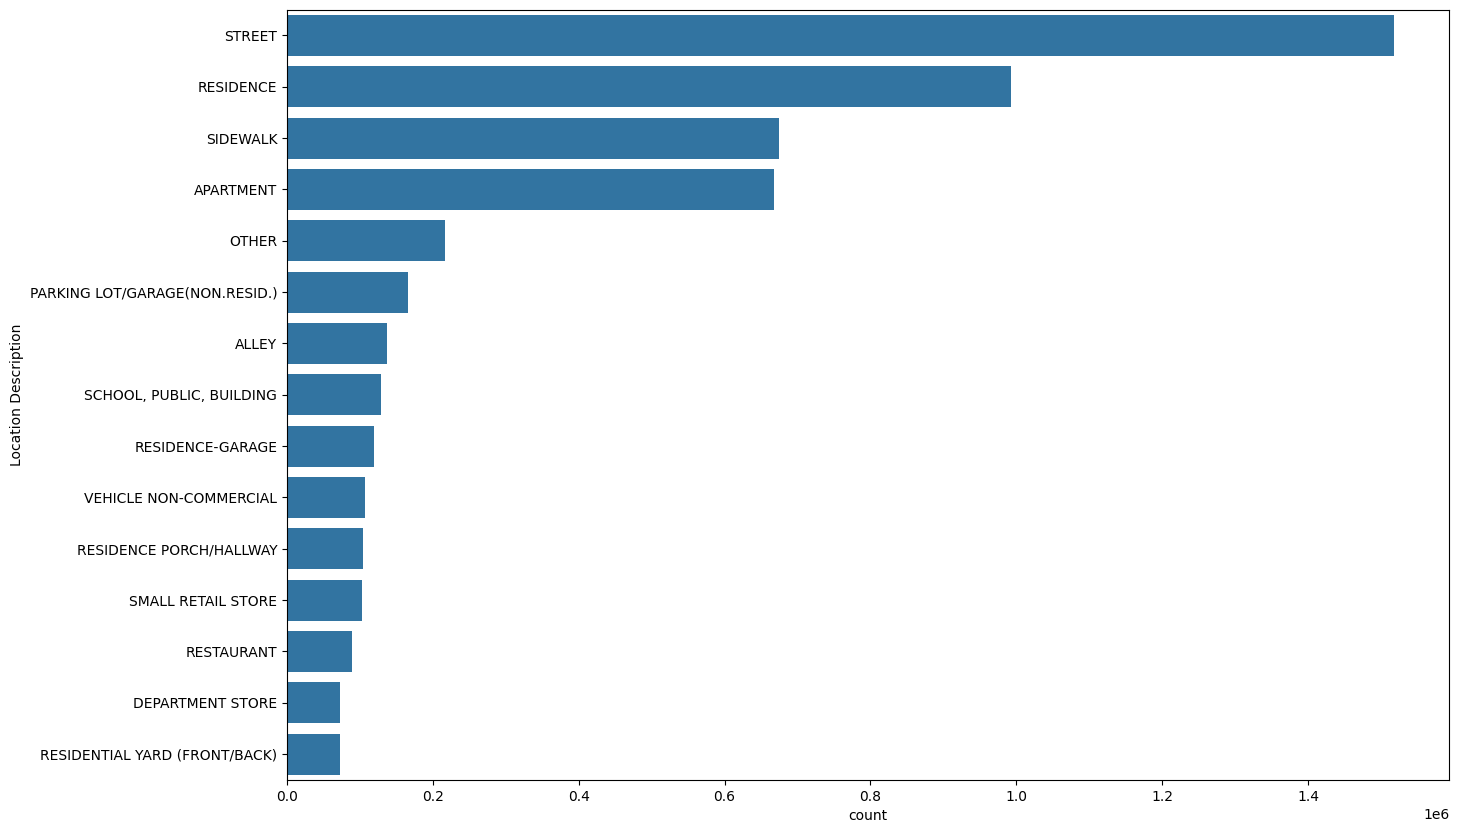

In [21]:
mplt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = entire_dataset, order = entire_dataset['Location Description'].value_counts().iloc[:15].index)

In [22]:
entire_dataset['Date'] = pd.to_datetime(entire_dataset['Date'])
entire_dataset.set_index('Date', inplace=True)


entire_dataset.resample('YE').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

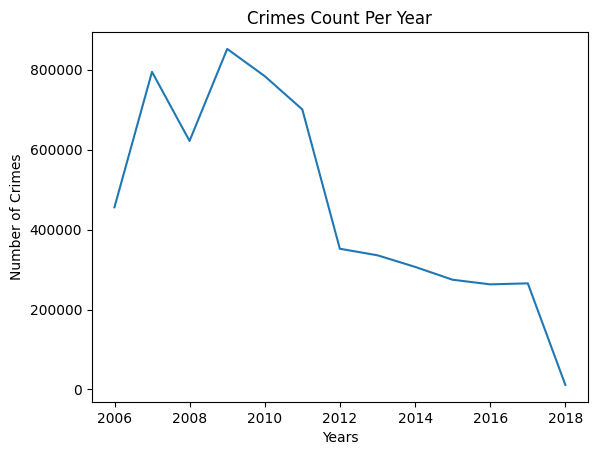

In [23]:
mplt.plot(entire_dataset.resample('YE').size())
mplt.title('Crimes Count Per Year')
mplt.xlabel('Years')
mplt.ylabel('Number of Crimes')

In [24]:
entire_dataset.resample('ME').size()

Date
2005-01-31    33983
2005-02-28    32042
2005-03-31    36970
2005-04-30    38963
2005-05-31    40572
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: ME, Length: 145, dtype: int64

Text(0, 0.5, 'Number of Crimes')

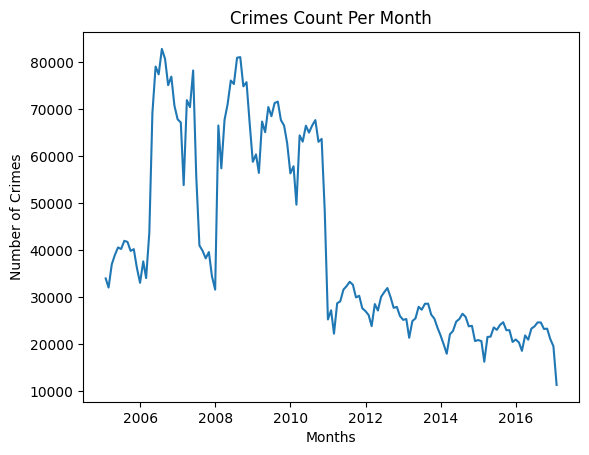

In [25]:
mplt.plot(entire_dataset.resample('ME').size())
mplt.title('Crimes Count Per Month')
mplt.xlabel('Months')
mplt.ylabel('Number of Crimes')

In [27]:
entire_dataset.resample('QE').size()

Date
2005-03-31    102995
2005-06-30    119769
2005-09-30    123550
2005-12-31    109497
2006-03-31    115389
2006-06-30    225489
2006-09-30    238423
2006-12-31    215383
2007-03-31    192791
2007-06-30    204361
2007-09-30    119086
2007-12-31    105610
2008-03-31    191523
2008-06-30    222331
2008-09-30    236695
2008-12-31    201504
2009-03-31    184055
2009-06-30    203916
2009-09-30    210446
2009-12-31    185483
2010-03-31    171848
2010-06-30    194453
2010-09-30    197116
2010-12-31    137274
2011-03-31     78167
2011-06-30     93064
2011-09-30     95835
2011-12-31     85000
2012-03-31     78574
2012-06-30     88283
2012-09-30     89685
2012-12-31     79128
2013-03-31     71651
2013-06-30     80776
2013-09-30     83510
2013-12-31     70766
2014-03-31     59964
2014-06-30     72991
2014-09-30     76090
2014-12-31     65482
2015-03-31     58503
2015-06-30     68239
2015-09-30     71782
2015-12-31     64471
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-

Text(0, 0.5, 'Number of Crimes')

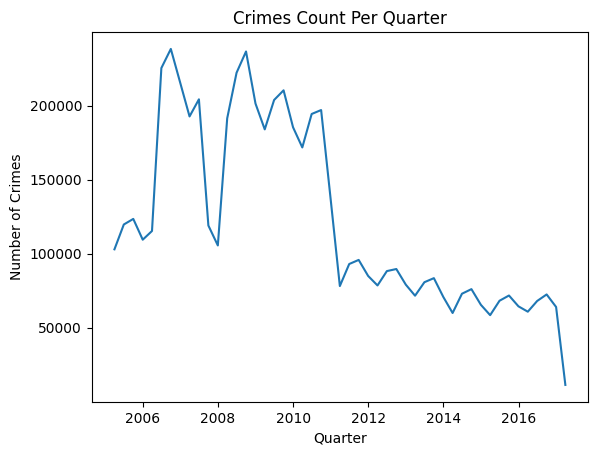

In [28]:
mplt.plot(entire_dataset.resample('QE').size())
mplt.title('Crimes Count Per Quarter')
mplt.xlabel('Quarter')
mplt.ylabel('Number of Crimes')

# Prepare The Data

In [30]:
crime_chicago_prophet = entire_dataset.resample('ME').size().reset_index()

In [31]:
crime_chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [33]:
crime_chicago_prophet.columns = ['Date', 'Crime Count']

In [34]:
crime_chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [35]:
crime_chicago_prophet_dataset = pd.DataFrame(crime_chicago_prophet)

In [36]:
crime_chicago_prophet_dataset

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Predictions

In [37]:
crime_chicago_prophet_dataset.columns

Index(['Date', 'Crime Count'], dtype='object')

In [38]:
crime_chicago_prophet_dataset_final = crime_chicago_prophet_dataset.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [39]:
crime_chicago_prophet_dataset_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [40]:
m = Prophet()
m.fit(crime_chicago_prophet_dataset_final)

16:55:30 - cmdstanpy - INFO - Chain [1] start processing
16:55:30 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = m.make_future_dataframe(periods=365) #feeding data to create a future based dataset
forecast = m.predict(future) # prophet predicts upperbandand lowerband and ton of other stuffs

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,39006.029750,71367.184876,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,33054.927218,68160.683300,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,44164.788833,75450.101235,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,43939.942336,77435.120123,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,48388.981067,82468.757256,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.391329,-13126.788532,22984.086261,9966.681958,10267.911315,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,0.0,0.0,0.0,5126.468613
506,2018-01-28,10091.324708,-11572.194696,23175.178658,9953.192604,10255.432885,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,0.0,0.0,0.0,5168.754412
507,2018-01-29,10078.258087,-11744.963690,20382.710985,9939.703250,10242.742670,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,0.0,0.0,0.0,5210.368432
508,2018-01-30,10065.191466,-11277.731956,20951.429597,9926.213897,10230.350868,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,0.0,0.0,0.0,5248.478965


# Blackdots are the data provided, blue line is the line of prediction, the data was only given till 2017, you can see its going beyond 2017 till 2018 
# to predict the future

C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


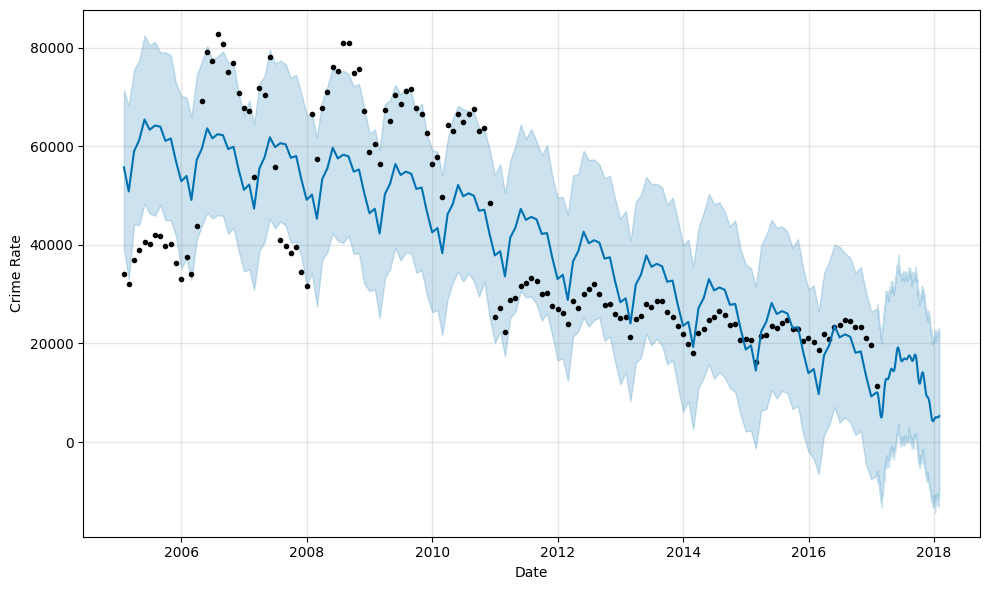

In [43]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate') 

C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

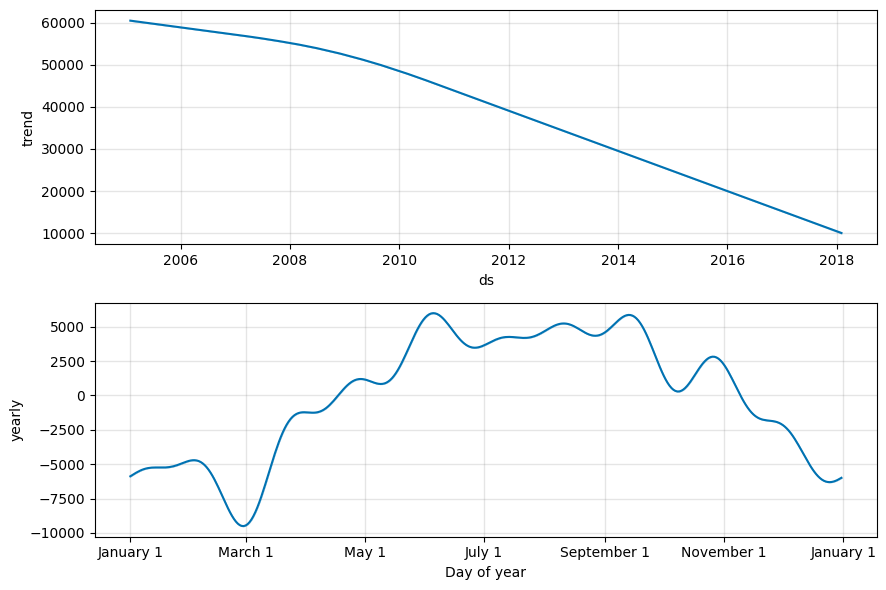

In [44]:
figure3 = m.plot_components(forecast)

# in the above prediction you can see that we get an output based on seasonality

# lets predict for 3 years

In [45]:
future = m.make_future_dataframe(periods=365*3)
forecast = m.predict(future)

In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,37896.801768,71637.521152,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,34912.286645,66924.844627,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,42113.620759,74633.941423,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,45093.041647,76519.911859,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,48711.732940,81668.032295,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2020-01-27,565.757908,-20418.888652,11858.598062,-327.778216,1465.281243,-5005.056482,-5005.056482,-5005.056482,-5005.056482,-5005.056482,-5005.056482,0.0,0.0,0.0,-4439.298574
1236,2020-01-28,552.691287,-21216.691231,11516.884761,-342.451801,1454.295172,-4950.327162,-4950.327162,-4950.327162,-4950.327162,-4950.327162,-4950.327162,0.0,0.0,0.0,-4397.635876
1237,2020-01-29,539.624665,-20871.692849,12470.317637,-357.125386,1443.309101,-4894.976062,-4894.976062,-4894.976062,-4894.976062,-4894.976062,-4894.976062,0.0,0.0,0.0,-4355.351396
1238,2020-01-30,526.558044,-20469.195302,13269.881717,-371.798970,1432.323029,-4841.675081,-4841.675081,-4841.675081,-4841.675081,-4841.675081,-4841.675081,0.0,0.0,0.0,-4315.117037


C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


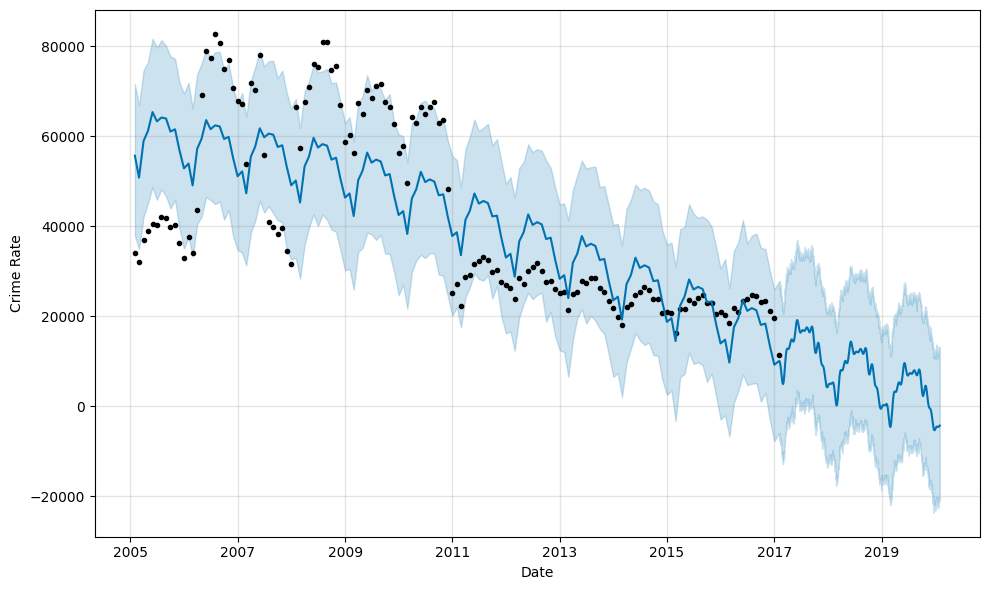

In [47]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate') 

C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\moham\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects in

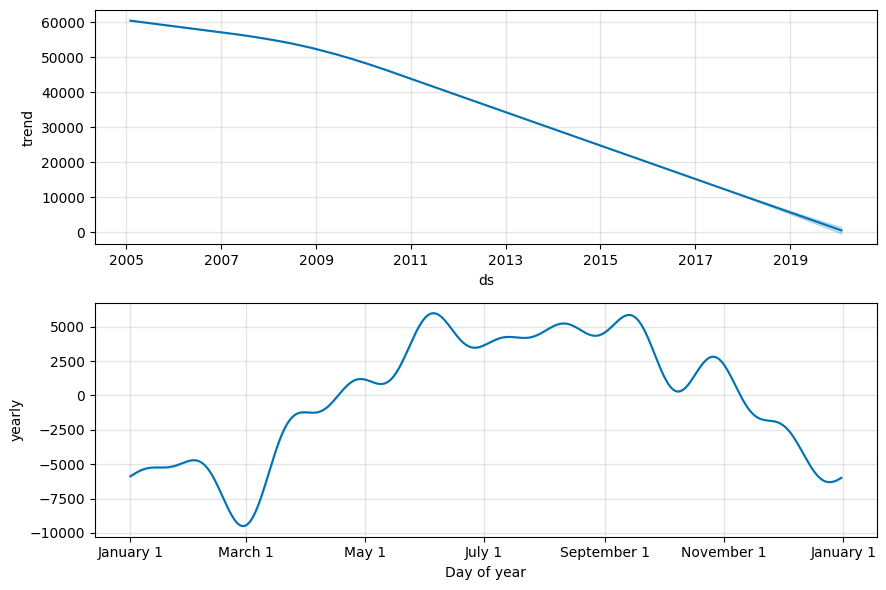

In [48]:
figure3 = m.plot_components(forecast)